# Data Generation

**CS5483 Data Warehousing and Data Mining**
___

## Introduction

This notebook demonstrates the data mining package written in Maxima, which is helpful for

- computing some mathematical criteria precisely without numerical error/instability, and
- creating randomized moodle stack questions. 

The implementations are simplified and may not be scalable to large data sets.

To load the package, run the following cell:

In [1]:
load("datamining.mac")$

To learn Maxima, you may use the `describe` function or refer to the [documentation](https://maxima.sourceforge.io/documentation.html) for more details:

In [2]:
describe(block)$




  There are also some inexact matches for `block'.
  Try `?? block' to see them.




 -- Function: block
          block ([<v_1>, ..., <v_m>], <expr_1>, ..., <expr_n>)
          block (<expr_1>, ..., <expr_n>)

     The function 'block' allows to make the variables <v_1>, ..., <v_m>
     to be local for a sequence of commands.  If these variables are
     already bound 'block' saves the current values of the variables
     <v_1>, ..., <v_m> (if any) upon entry to the block, then unbinds
     the variables so that they evaluate to themselves; The local
     variables may be bound to arbitrary values within the block but
     when the block is exited the saved values are restored, and the
     values assigned within the block are lost.

     If there is no need to define local variables then the list at the
     beginning of the 'block' command may be omitted.  In this case if
     neither 'return' nor 'go' are used 'block' behaves similar to the
     following construct:

          ( expr_1, expr_2,... , expr_n );

     <expr_1>, ..., <expr_n> will be evaluated in sequ

As an example, the following defines a function that computes the maxima of its arguments:

In [3]:
maxima([lst]):=
if length(lst)>1 
/* recur on tail maxima (tm) */
then block(
    [tm :apply('maxima,rest(lst))],
    if lst[1]>=tm[2] 
    then maxima(lst[1]) 
    else [tm[1]+1,tm[2]]
)
/* base cases */
else if length(lst)>0 
then [1, lst[1]]
else [0, -inf]$

maxima(1,2,3,2,1);

(%o3)                               [3, 3]

In the above example, `maxima([lst])` is a recursive function that 
- takes a variable number of arguments, which will be stored in `lst` as a list, and
- returns a list `[i,m]` as follows:
  - If `lst` is non-empty, `lst[i]=m` is a maximum element of `lst` and `i` is the smallest such index.
  - If `lst` is empty, then `[0,-inf]` is returned, following the conventions that 
    - the maximum element of an empty list `[]` of numbers is `-inf`, and 
    - Maxima uses 1-based numbering so `0` is the index of an imaginary item before the first item in a list.

:::{note}

- Comments can be delimited by `/*` and `*/` as in `/* base cases */`.
- Trailing ; ends an expression and prints its value. E.g.,

    ```
    maxima(1,2,3,2,1);
    ```
    applies call the `maxima` function display its output. 
- Trailing \$ ends an expression without printing its value. E.g.,

    ```
    maxima([lst]):=
    ...
    else [0, -inf]$
    ```
    defines a function without displaying it in the output cell.


:::

## Generate data from lists

Data is a matrix of feature values associated with feature names. Data can be created by `build_data_from_list(fns, lst)` where
- `fns` is a list of feature names, and 
- `lst` is a list of instances, which are lists of feature values corresponding to the feature names.

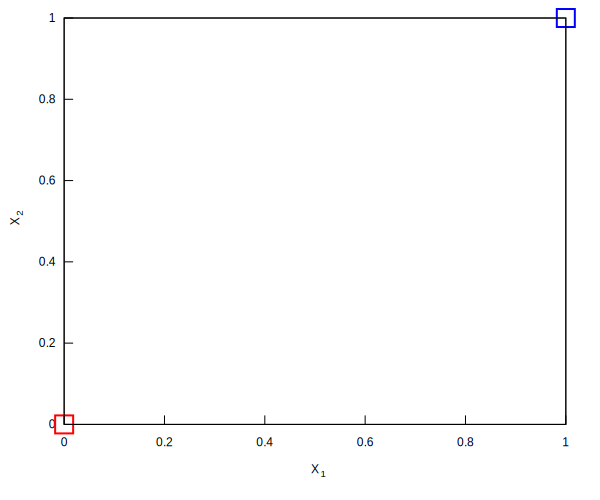

       [ i  X_1  X_2  Y ]
       [                ]
(%o5) [[ 1   0    0   0 ], [i, X_1, X_2, Y], 2, 4, [1, 0, 0, 0], [0, 1]]
       [                ]
       [ 2   1    1   1 ]

In [4]:
set_draw_defaults(file_name="images/maxplot.svg", terminal=svg, point_type=square, point_size=2)$

block(
    [
        fns: ['i, 'X_1, 'X_2, 'Y],           /* feature names */
        lst: [[1, 0, 0, 0], [2, 1, 1, 1]],   /* instances */
        target: 'Y,
        xy: ['X_1, 'X_2],
        data
    ],
    data: build_data_from_list(fns, lst),
    plot_labeled_data(data,xy,target),
    [
        data, 
        feature_names(data), 
        size(data), 
        feature_index(fns, target), 
        get_data(data, 1), 
        feature_values(data, target)
    ]
);

Information of the data can be obtained using other functions:

- `feature_names(data)` returns the feature names of `data`.
- `size(data)` returns the number of instances of `data`.
- `feature_index(fns, fn)` returns the index of a feature named `fn` in the list `fns` of feature names.
- `get_data(data, i)` returns the `i`-th instance of `data`.
- `feature_values(data, fn)` returns the list of feature values of the feature `fn`.
- `plot_labeled_data(data,xy,target)`

```
plot_labeled_data(data,xy,target)
```

plots the labeled `data` where

- `xy` specifies the pair of features for the $x$ and $y$ axes, and
- `target` is used to color code the data points.

:::{note}

```set_draw_defaults(file_name="images/maxplot.svg", terminal=svg, point_type=square, point_size=2)$```

configures the format of the plot.
:::

## Generate data with rules

Data can also be generated (randomly) according to some specified rules using `build_data(fns, gen, n)` where
- `fns` is a list of feature names,
- `gen` is a function that takes a unique index and generates an instance associated with the index, and
- `n` is the number of instances to generate.

In [5]:
block(
    [
        fns: ['i, 'X_1, 'X_2, 'Y],
        gen: lambda([i],
            [
                i,
                random(3),
                random(3),
                if 'X_1<1 and 'X_2>0 then 1 else 0
            ]),
        n: 10
    ],
    build_data(fns, gen, n)
);

                              [ i   X_1  X_2  Y ]
                              [                 ]
                              [ 1    2    0   0 ]
                              [                 ]
                              [ 2    2    2   0 ]
                              [                 ]
                              [ 3    1    1   0 ]
                              [                 ]
                              [ 4    2    2   0 ]
                              [                 ]
(%o6)                         [ 5    0    1   1 ]
                              [                 ]
                              [ 6    1    2   0 ]
                              [                 ]
                              [ 7    0    0   0 ]
                              [                 ]
                              [ 8    2    0   0 ]
                              [                 ]
                              [ 9    0    1   1 ]
                              [                 ]


In the above example, 
- $i$ is the unique index,
- $X_1$ and $X_2$ are uniformly random generated from $\Set{0,1,2}$, and
- $Y$ is a deterministic function of $X_1$ and $X_2$, namely,  
$$
Y=\begin{cases}
1 & X_1<1, X_2>0\\
0 & \text{otherwise.}
\end{cases}
$$

:::{note}
The value of a feature 
- can depend on the index and the values of all the previously generated features of the same instance, but
- cannot depend on the feature values of other instances.
:::

## Transform features

New features can be created by transforming existing ones using `transform_features(data, nfns, ngen)` where
- `data` is a data set,
- `nfns` is the list of new feature names, and
- `ngen` is a function that takes a unique index and returns an instance.

In [6]:
block(
    [
        fns: ['X_1, 'X_2],
        gen: lambda([i], 
            [
                random(3), 
                random(3)
            ]),
        n: 10,
        nfns: ['i, 'X_1, 'X_2, 'Y],
        ngen: lambda([i],
            [
                i,
                'X_1,
                'X_2,
               if 'X_1<1 and 'X_2>0 then 1 else 0 
            ]
        ),
        data
    ],
    data: build_data(fns, gen, n),
    [data, transform_features(data, nfns, ngen)]
);

                       [ X_1  X_2 ]  [ i   X_1  X_2  Y ]
                       [          ]  [                 ]
                       [  2    1  ]  [ 1    2    1   0 ]
                       [          ]  [                 ]
                       [  2    1  ]  [ 2    2    1   0 ]
                       [          ]  [                 ]
                       [  0    2  ]  [ 3    0    2   1 ]
                       [          ]  [                 ]
                       [  1    0  ]  [ 4    1    0   0 ]
                       [          ]  [                 ]
(%o7)                 [[  1    2  ], [ 5    1    2   0 ]]
                       [          ]  [                 ]
                       [  0    0  ]  [ 6    0    0   0 ]
                       [          ]  [                 ]
                       [  1    2  ]  [ 7    1    2   0 ]
                       [          ]  [                 ]
                       [  0    1  ]  [ 8    0    1   1 ]
                       [      

In the above example, 
- the features $X1$ and $X2$ in `data` are transformed to create the feature $Y$, and
- the row index is used to create the feature $i$.

:::{note}
A new feature 
- can depend on the index, all previously generated features and the features in `data` of the same instance, but
- cannot depend on the feature values of other instances. 
:::

## Subsample data

To subsample data based on specific conditions, use `subsample_data(data, cond)` where

- `data` is the data to subsample, and
- `cond` is a function that takes a row index and returns a boolean expression on the feature names. 

It returns `data` but keeping only the instances indexed by `i` where `cond[i]` evaluates to true with the feature names substituted by the corresponding feature values.

In [7]:
block(
    [
        fns: ['X_1, 'X_2],
        gen: lambda([i],
            [
                random(3),
                random(3)
            ]),
        n: 10,
        cond: lambda([i],
            'X_1<1 and 'X_2>0
        ),
        data
    ],
    data: build_data(fns, gen, n),
    [data, subsample_data(data, cond)]
);

                          [ X_1  X_2 ]
                          [          ]
                          [  0    0  ]
                          [          ]
                          [  2    0  ]
                          [          ]
                          [  2    0  ]
                          [          ]
                          [  0    1  ]
                          [          ]  [ X_1  X_2 ]
(%o8)                    [[  1    2  ], [          ]]
                          [          ]  [  0    1  ]
                          [  1    2  ]
                          [          ]
                          [  2    0  ]
                          [          ]
                          [  0    0  ]
                          [          ]
                          [  1    2  ]
                          [          ]
                          [  1    2  ]

In the above example, only instances with $X_1<1$ and $X_2>0$ are returned.

## Combine data

Data can be stacked (vertically) by `stack_data(data_1, data_2, ...)` where `data_i`'s are data with the same list of features.

In [8]:
block(
    [
        fns: ['i, 'X_1, 'X_2]
    ],
    data_1: build_data(fns, lambda([i], [i, random(2), random(2)]),4),
    data_2: build_data(fns, lambda([i], [i, 3+random(2), random(2)]),4),
    data: transform_features(stack_data(data_1, data_2), fns, lambda([i], [i, 'X_1, 'X_2])),
    [data_1, data_2, data]
);

                                                 [ i  X_1  X_2 ]
                                                 [             ]
                                                 [ 1   1    1  ]
                                                 [             ]
               [ i  X_1  X_2 ]  [ i  X_1  X_2 ]  [ 2   0    0  ]
               [             ]  [             ]  [             ]
               [ 1   1    1  ]  [ 1   4    1  ]  [ 3   0    0  ]
               [             ]  [             ]  [             ]
(%o9)         [[ 2   0    0  ], [ 2   4    0  ], [ 4   0    0  ]]
               [             ]  [             ]  [             ]
               [ 3   0    0  ]  [ 3   4    1  ]  [ 5   4    1  ]
               [             ]  [             ]  [             ]
               [ 4   0    0  ]  [ 4   4    0  ]  [ 6   4    0  ]
                                                 [             ]
                                                 [ 7   4    1  ]
                        

In the above example, `data` consists of instances from `data_1` and `data_2`. 

:::{note}
The index column is regenerated using `transform_features` for `data` so that every instance has a unique index.
:::